# Intro to DeepLearning algorithm 
## Getting images

### Step 1 - get api key 
* https://www.microsoft.com/en-us/maps/create-a-bing-maps-key
* sign in 
* generate api key 

### Step 2 - do the following

In [1]:
from DeepPoolAI import AerialImage

In [2]:
# Your Bing Maps Api key Here
# for example from file listed in .gitignore
f = open('key', 'r')
key = f.read()

In [3]:
ai = AerialImage(key = key,zoomLevel=17, height=300, width=1000)

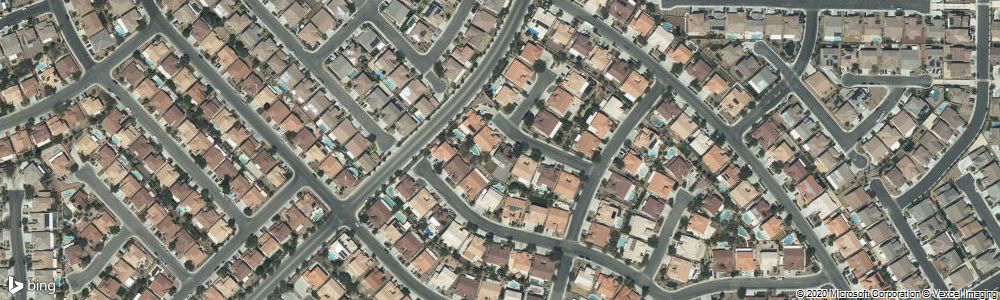

In [4]:
photo = ai.get_photo(lat=36.280659, long = -115.162661)
photo

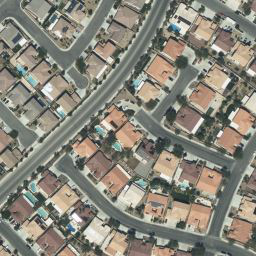

In [5]:
ai.get_square_photo(lat=36.280659, long = -115.162661)